## Image Caption Generator

We are going to use Transformers model to generate caption from an Image.

### Installation



1.   Transformers
2.   Pytorch
3. Image

For installation, please do pip install package_name

In Colab, Pytorch comes preinstalled and same goes with PIL for Image. You will only need to install **transformers** from Huggingface.




In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.1 MB/s eta 0:00:00


In [2]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image

In [4]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

predict_step(['Test.png']) # ['a woman in a hospital bed with a woman in a hospital bed']

Some weights of the model checkpoint at nlpconnect/vit-gpt2-image-captioning were not used when initializing VisionEncoderDecoderModel: ['decoder.transformer.h.6.attn.bias', 'decoder.transformer.h.3.crossattention.bias', 'decoder.transformer.h.4.crossattention.bias', 'decoder.transformer.h.5.attn.bias', 'decoder.transformer.h.3.crossattention.masked_bias', 'decoder.transformer.h.4.attn.masked_bias', 'decoder.transformer.h.7.attn.bias', 'decoder.transformer.h.10.crossattention.masked_bias', 'decoder.transformer.h.8.attn.masked_bias', 'decoder.transformer.h.5.crossattention.bias', 'decoder.transformer.h.11.crossattention.bias', 'decoder.transformer.h.6.crossattention.bias', 'decoder.transformer.h.6.attn.masked_bias', 'decoder.transformer.h.5.attn.masked_bias', 'decoder.transformer.h.8.crossattention.bias', 'decoder.transformer.h.10.crossattention.bias', 'decoder.transformer.h.7.attn.masked_bias', 'decoder.transformer.h.9.crossattention.masked_bias', 'decoder.transformer.h.11.attn.bias', 

["a collage of children's toys and a cartoon character"]

In [26]:
test

['a man holding a cell phone in his right hand']

## Sentiment analysis
since having a perspective of the tone of the post is vital

In [16]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 35.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.9/135.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 62.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 49.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 

In [47]:
import textblob, cv2
from google.colab.patches import cv2_imshow
from flair.models import TextClassifier
from flair.data import Sentence
sia = TextClassifier.load('en-sentiment')
def flair_prediction(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return "pos"
    elif "NEGATIVE" in str(score):
        return "neg"
    else:
        return "neu"

In [43]:
imgpath = ['/content/test_grp.jpg', '/content/download.jpg','/content/test_dummy.jpg']

CPU times: user 7.12 s, sys: 15.1 ms, total: 7.13 s
Wall time: 7.13 s


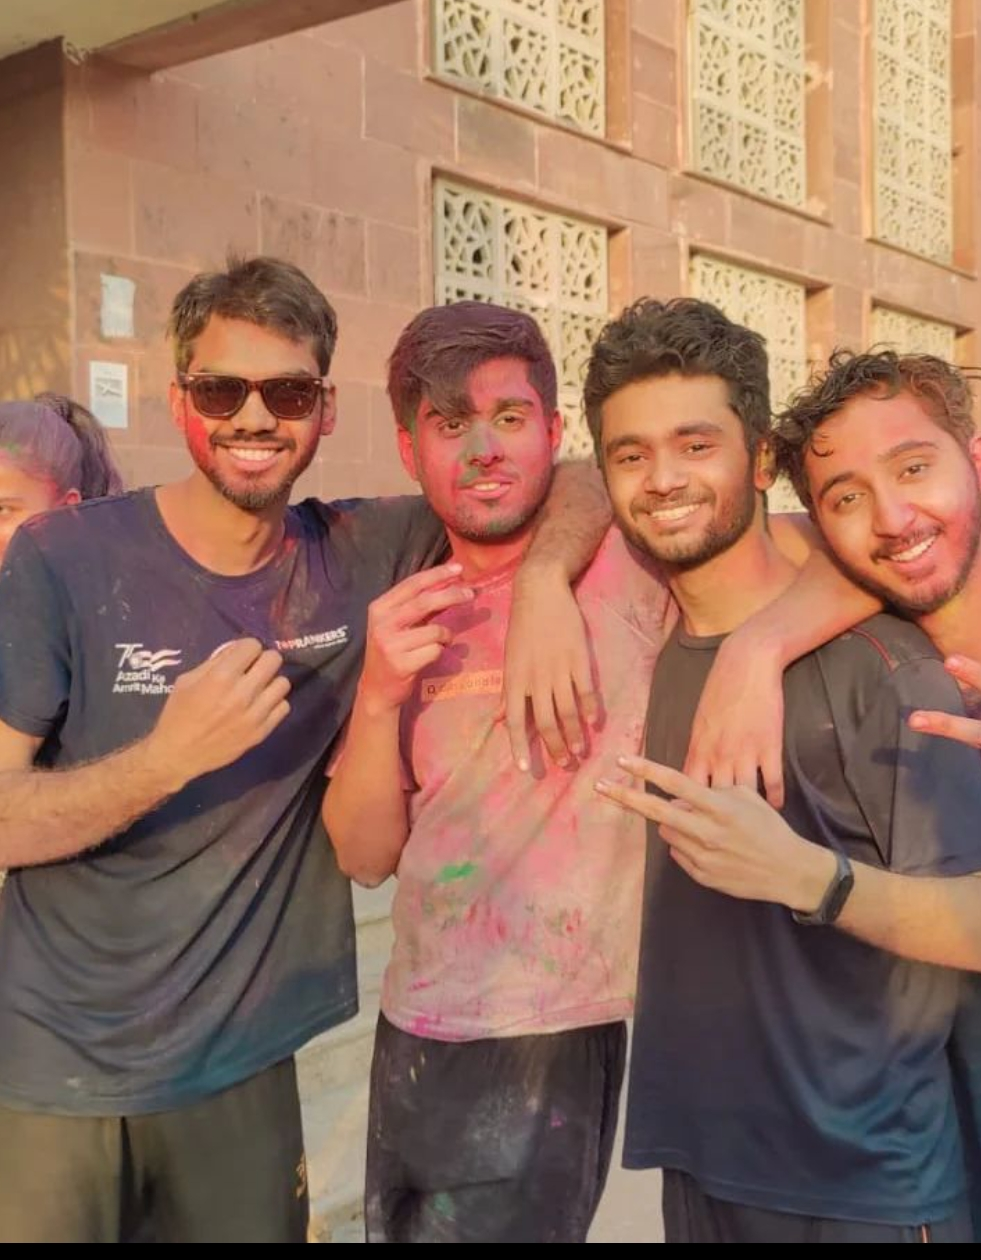

['a group of young men standing next to each other']
-0.008333333333333331
0.25833333333333336


In [51]:
img = cv2.imread(imgpath[0])
%time test = predict_step([imgpath[0]])
sentiment = textblob.TextBlob(test[0]).sentiment
cv2_imshow(img)
print(test)
print(sentiment.polarity)
# 1.0
print(sentiment.subjectivity)
# 0.75